In [1]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten
from keras.applications import ResNet50
from keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [2]:
resnet50=ResNet50(include_top=False,weights='imagenet', input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


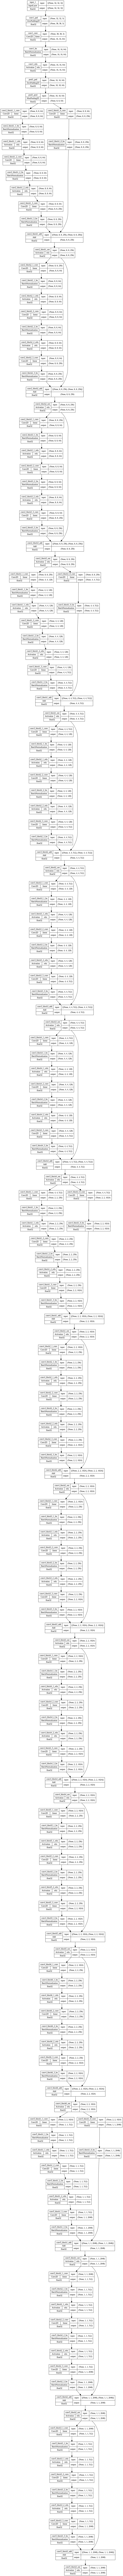

In [3]:
plot_model(resnet50, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
flattened= Flatten()(resnet50.output)
#fully connected layer
fc1 = Dense(128, activation='relu',name="AddedDense1")(flattened)
# fully connected layer, output layer
fc2 = Dense(10, activation='softmax',name="AddedDense2")(fc1)

In [7]:
resnet50.trainable = False

In [9]:
model=Model(inputs=resnet50.inputs,outputs=fc2)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 35s 16ms/step - loss: 1.3015 - accuracy: 0.5487
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0698 - accuracy: 0.6210
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9829 - accuracy: 0.6505
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9228 - accuracy: 0.6720
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8670 - accuracy: 0.6933


In [12]:
resnet50.trainable = True

In [13]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 115s 51ms/step - loss: 1.4491 - accuracy: 0.5030
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.3021 - accuracy: 0.5467
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3886 - accuracy: 0.5128
Epoch 4/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2227 - accuracy: 0.5715
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1271 - accuracy: 0.6106
